In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Telkom service feedbacks in kenya.csv')
data

,Date,Customer,Customer_feedback,catogory,TelkomKenya
0,05/03/22,Nicholas macharia,Why haven’t activated my number after uploadi...,2.0,We regret the experience kindly Dm the number
1,05/03/22,Dann Right,Kisii County has low newtork coverage,2.0,we shared the location with optimization tea...
2,05/03/22,joel,Network is very poor,2.0,Share the location we shall advice we we have...
3,05/03/22,jackson ngari,keep on deducting our airtime without our consent,3.0,"Apologies to the experience ,we would like to..."
4,05/03/22,Aizak the ngugi No longer need telcom,I longer need telkom since their 5gb last fi...,4.0,5GB friday last 72 hours share your number so ...
...,...,...,...,...,...
97,19/02/2022,kaligraph,There is a problem with your network every eve...,2.0,"Hello @kaligraph_jj, we regret the experience...."
98,19/02/2022,Felix,I will still inform you to revise your Mzito B...,2.0,"Hello Felix, we appreciate the feedback and sh..."
99,19/02/2022,Libra,I'm trying to buy data but my USSD is not work...,2.0,"Hello @LibraGoddess15, we regret the experienc..."
100,19/02/2022,Godfrey,Check on your network in bungoma calls and int...,2.0,"Hello @Godfreymasika7, we regret the experienc..."


In [3]:
data["Customer_feedback"]

0      Why haven’t  activated my number after uploadi...
1                  Kisii County has low newtork coverage
2                                   Network is very poor
3      keep on deducting our airtime without our consent
4       I longer need telkom  since their 5gb last fi...
                             ...                        
97     There is a problem with your network every eve...
98     I will still inform you to revise your Mzito B...
99     I'm trying to buy data but my USSD is not work...
100    Check on your network in bungoma calls and int...
101    my net if off since morning I live in kisumu y...
Name: Customer_feedback, Length: 102, dtype: object

In [4]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
data["Customer_feedback_clean"] = data["Customer_feedback"].apply(lambda x: clean_text(x))

In [5]:
data

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean
0,05/03/22,Nicholas macharia,Why haven’t activated my number after uploadi...,2.0,We regret the experience kindly Dm the number,haven’t activate number uploading id
1,05/03/22,Dann Right,Kisii County has low newtork coverage,2.0,we shared the location with optimization tea...,kisii county low newtork coverage
2,05/03/22,joel,Network is very poor,2.0,Share the location we shall advice we we have...,network poor
3,05/03/22,jackson ngari,keep on deducting our airtime without our consent,3.0,"Apologies to the experience ,we would like to...",keep deducting airtime without consent
4,05/03/22,Aizak the ngugi No longer need telcom,I longer need telkom since their 5gb last fi...,4.0,5GB friday last 72 hours share your number so ...,long need telkom since last five hour let get ...
...,...,...,...,...,...,...
97,19/02/2022,kaligraph,There is a problem with your network every eve...,2.0,"Hello @kaligraph_jj, we regret the experience....",problem network every evening kisumu nowadays ...
98,19/02/2022,Felix,I will still inform you to revise your Mzito B...,2.0,"Hello Felix, we appreciate the feedback and sh...",still inform revise mzito bundle package previ...
99,19/02/2022,Libra,I'm trying to buy data but my USSD is not work...,2.0,"Hello @LibraGoddess15, we regret the experienc...",i'm try buy data ussd work
100,19/02/2022,Godfrey,Check on your network in bungoma calls and int...,2.0,"Hello @Godfreymasika7, we regret the experienc...",check network bungoma call internet service so...


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["Customer_feedback_clean"].apply(lambda x: sid.polarity_scores(x))

In [7]:
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

In [8]:
# add number of characters column
data["nb_chars"] = data["Customer_feedback_clean"].apply(lambda x: len(x))

# add number of words column
data["nb_words"] = data["Customer_feedback_clean"].apply(lambda x: len(x.split(" ")))

In [9]:
data

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words
0,05/03/22,Nicholas macharia,Why haven’t activated my number after uploadi...,2.0,We regret the experience kindly Dm the number,haven’t activate number uploading id,0.000,0.755,0.245,0.0772,36,5
1,05/03/22,Dann Right,Kisii County has low newtork coverage,2.0,we shared the location with optimization tea...,kisii county low newtork coverage,0.344,0.656,0.000,-0.2732,33,5
2,05/03/22,joel,Network is very poor,2.0,Share the location we shall advice we we have...,network poor,0.756,0.244,0.000,-0.4767,12,2
3,05/03/22,jackson ngari,keep on deducting our airtime without our consent,3.0,"Apologies to the experience ,we would like to...",keep deducting airtime without consent,0.294,0.706,0.000,-0.1695,38,5
4,05/03/22,Aizak the ngugi No longer need telcom,I longer need telkom since their 5gb last fi...,4.0,5GB friday last 72 hours share your number so ...,long need telkom since last five hour let get ...,0.000,1.000,0.000,0.0000,65,12
...,...,...,...,...,...,...,...,...,...,...,...,...
97,19/02/2022,kaligraph,There is a problem with your network every eve...,2.0,"Hello @kaligraph_jj, we regret the experience....",problem network every evening kisumu nowadays ...,0.229,0.593,0.178,-0.1531,64,9
98,19/02/2022,Felix,I will still inform you to revise your Mzito B...,2.0,"Hello Felix, we appreciate the feedback and sh...",still inform revise mzito bundle package previ...,0.000,0.800,0.200,0.5423,103,15
99,19/02/2022,Libra,I'm trying to buy data but my USSD is not work...,2.0,"Hello @LibraGoddess15, we regret the experienc...",i'm try buy data ussd work,0.000,1.000,0.000,0.0000,26,6
100,19/02/2022,Godfrey,Check on your network in bungoma calls and int...,2.0,"Hello @Godfreymasika7, we regret the experienc...",check network bungoma call internet service so...,0.000,1.000,0.000,0.0000,53,7


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(data["Customer_feedback_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data.index
data = pd.concat([data, tfidf_df], axis=1)

In [11]:
data

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
0,05/03/22,Nicholas macharia,Why haven’t activated my number after uploadi...,2.0,We regret the experience kindly Dm the number,haven’t activate number uploading id,0.000,0.755,0.245,0.0772,36,5,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,05/03/22,Dann Right,Kisii County has low newtork coverage,2.0,we shared the location with optimization tea...,kisii county low newtork coverage,0.344,0.656,0.000,-0.2732,33,5,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,05/03/22,joel,Network is very poor,2.0,Share the location we shall advice we we have...,network poor,0.756,0.244,0.000,-0.4767,12,2,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
3,05/03/22,jackson ngari,keep on deducting our airtime without our consent,3.0,"Apologies to the experience ,we would like to...",keep deducting airtime without consent,0.294,0.706,0.000,-0.1695,38,5,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,05/03/22,Aizak the ngugi No longer need telcom,I longer need telkom since their 5gb last fi...,4.0,5GB friday last 72 hours share your number so ...,long need telkom since last five hour let get ...,0.000,1.000,0.000,0.0000,65,12,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,19/02/2022,kaligraph,There is a problem with your network every eve...,2.0,"Hello @kaligraph_jj, we regret the experience....",problem network every evening kisumu nowadays ...,0.229,0.593,0.178,-0.1531,64,9,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
98,19/02/2022,Felix,I will still inform you to revise your Mzito B...,2.0,"Hello Felix, we appreciate the feedback and sh...",still inform revise mzito bundle package previ...,0.000,0.800,0.200,0.5423,103,15,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0
99,19/02/2022,Libra,I'm trying to buy data but my USSD is not work...,2.0,"Hello @LibraGoddess15, we regret the experienc...",i'm try buy data ussd work,0.000,1.000,0.000,0.0000,26,6,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
100,19/02/2022,Godfrey,Check on your network in bungoma calls and int...,2.0,"Hello @Godfreymasika7, we regret the experienc...",check network bungoma call internet service so...,0.000,1.000,0.000,0.0000,53,7,0.0,0.841309,0.0,0.540554,0.0,0.0,0.0


In [12]:
# show is_pos itive review distribution
data["pos"].value_counts(normalize = True).head(5)

0.000    0.549020
0.744    0.029412
0.178    0.019608
0.402    0.019608
0.200    0.019608
Name: pos, dtype: float64

In [13]:
# highest positive sentiment reviews (with more than 5 words)
data[data["nb_words"] >= 5].sort_values("pos", ascending = False)[["Customer_feedback_clean", "pos"]].head(10)

,Customer_feedback_clean,pos
14,good bundle offer try improve strength network,0.692
20,help bro wait help last one year,0.519
89,network issue network kindly work,0.444
94,since wake signal strength zero flat can't eve...,0.437
7,tried forthcoming promise birthday promise dm ...,0.434
19,guy excellent offer internet slow ever,0.425
88,wish would solve network problem eldoret airport,0.402
82,great offer poor network coverage,0.402
32,good evening hello iam ronoh alex want know su...,0.399
52,buy credit deplete without subscribe anything,0.342


In [14]:
Poor_net=data.query('catogory=="2"')
Poor_net

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
0,05/03/22,Nicholas macharia,Why haven’t activated my number after uploadi...,2.0,We regret the experience kindly Dm the number,haven’t activate number uploading id,0.000,0.755,0.245,0.0772,36,5,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0
1,05/03/22,Dann Right,Kisii County has low newtork coverage,2.0,we shared the location with optimization tea...,kisii county low newtork coverage,0.344,0.656,0.000,-0.2732,33,5,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0
2,05/03/22,joel,Network is very poor,2.0,Share the location we shall advice we we have...,network poor,0.756,0.244,0.000,-0.4767,12,2,0.0,0.000000,0.0,1.000000,0.00000,0.0,0.0
5,05/03/22,kipkirui ezrah,You have the offers but nework is so bad,2.0,Share the location we shall advice we we have...,offer nework bad,0.636,0.364,0.000,-0.5423,16,3,0.0,0.000000,0.0,0.000000,1.00000,0.0,0.0
8,05/03/22,Evans Bettq,Good offers but improve on your network,2.0,Currently working on network upgrade across co...,good offer improve network,0.000,0.256,0.744,0.7003,26,4,0.0,0.000000,0.0,0.550417,0.83489,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,19/02/2022,kaligraph,There is a problem with your network every eve...,2.0,"Hello @kaligraph_jj, we regret the experience....",problem network every evening kisumu nowadays ...,0.229,0.593,0.178,-0.1531,64,9,0.0,0.000000,0.0,1.000000,0.00000,0.0,0.0
98,19/02/2022,Felix,I will still inform you to revise your Mzito B...,2.0,"Hello Felix, we appreciate the feedback and sh...",still inform revise mzito bundle package previ...,0.000,0.800,0.200,0.5423,103,15,1.0,0.000000,0.0,0.000000,0.00000,0.0,0.0
99,19/02/2022,Libra,I'm trying to buy data but my USSD is not work...,2.0,"Hello @LibraGoddess15, we regret the experienc...",i'm try buy data ussd work,0.000,1.000,0.000,0.0000,26,6,0.0,0.000000,0.0,0.000000,0.00000,0.0,1.0
100,19/02/2022,Godfrey,Check on your network in bungoma calls and int...,2.0,"Hello @Godfreymasika7, we regret the experienc...",check network bungoma call internet service so...,0.000,1.000,0.000,0.0000,53,7,0.0,0.841309,0.0,0.540554,0.00000,0.0,0.0


In [15]:
Blocking=data.query('catogory=="1"')
Blocking

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
11,04/03/02,David,Why are you blocking lines? Though mine is sti...,1.0,"Hi David, we are deactivating lines which were...",block line though mine still work,0.367,0.633,0.000,-0.4404,33,6,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.707107
15,04/03/22,jobse_josh,My telkom simcard has been deactivated after t...,1.0,"Hi @Jobse_Josh, apologies for the inconvenienc...",telkom simcard deactivate try register several...,0.000,1.000,0.000,0.0000,69,10,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000
23,04/03/22,jess,Why has my simcard been blocked,1.0,"Hi Jess, your experience is unfortunate. Kindl...",simcard block,0.744,0.256,0.000,-0.4404,13,2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
24,04/03/22,Yobi,my simcard been blocked,1.0,"Hi Yobi, we sincerely regret the experience. K...",simcard block,0.744,0.256,0.000,-0.4404,13,2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25,04/03/22,Mark,Sort out my line ffs!,1.0,"Hi Mark, we regret the experience. Kindly DM a...",sort line ffs,0.655,0.345,0.000,-0.5859,13,3,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000
27,04/03/22,FaluzizMe,My line has been suspended,1.0,"Hi @FAZULizMe, we have been in touch, kindly b...",line suspend,0.697,0.303,0.000,-0.3182,12,2,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000
28,04/03/22,Mojinga,My telkom number has been deactivated and i ha...,1.0,"Hi @mojingamojinga, apologies for the experien...",telkom number deactivate buy monthly bundle pr...,0.000,0.843,0.157,0.0772,56,8,0.697949,0.0,0.000000,0.0,0.0,0.716148,0.000000
32,03/03/22,RonohHazard,Good evening ? Hello iam Ronoh Alex I want to ...,1.0,"Hi @RonohHazard, Apologies for the experience ...",good evening hello iam ronoh alex want know su...,0.167,0.435,0.399,0.2960,58,10,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
34,03/03/22,Rono Jeff,You mean perfect bundle yet my 7Gb gone after ...,1.0,Kindly note sim verification is a government t...,mean perfect bundle yet go deactivate line tel...,0.174,0.618,0.208,0.1531,73,13,0.688135,0.0,0.725583,0.0,0.0,0.000000,0.000000


In [16]:
Deducting_credit=data.query('catogory=="3"')
Deducting_credit

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
3,05/03/22,jackson ngari,keep on deducting our airtime without our consent,3.0,"Apologies to the experience ,we would like to...",keep deducting airtime without consent,0.294,0.706,0.000,-0.1695,38,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,04/03/22,benny Kimani keep on deducting our airtime wit...,You guys keep on deducting our airtime everyti...,3.0,"Hi @bennykim_bk, apologies for the experience....",guy keep deduct airtime everytime top would al...,0.102,0.672,0.226,0.2579,102,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,04/03/22,Abidstar,What's wrong with your network? I have recharg...,3.0,NaN,what's wrong network recharge via mpesa yet re...,0.307,0.693,0.000,-0.4767,51,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
switching=data.query('catogory=="4"')
switching

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
4,05/03/22,Aizak the ngugi No longer need telcom,I longer need telkom since their 5gb last fi...,4.0,5GB friday last 72 hours share your number so ...,long need telkom since last five hour let get ...,0.0,1.0,0.0,0.0,65,12,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
Birthday_data_failure=data.query('catogory=="5"')
Birthday_data_failure

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
6,05/03/22,jackson ngari,No birthday data award has promised,5.0,Share your number for further assistance,birthday data award promise,0.0,0.256,0.744,0.7003,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,05/03/22,jackson ngari,Tried of your forthcoming promises for birthda...,5.0,Check the revert,tried forthcoming promise birthday promise dm ...,0.0,0.566,0.434,0.5574,58,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
query=data.query('catogory=="6"')
query

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
9,05/03/22,Joseph Mwangi,How do we buy,6.0,NaN,buy,0.0,1.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
No_assistance=data.query('catogory=="7"')
No_assistance

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
20,04/03/22,Rony,"They won't help you bro, I have been waiting f...",7.0,NaN,help bro wait help last one year,0.0,0.481,0.519,0.6597,32,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
Satified_customers=data.query('catogory=="8"')
Satified_customers

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
26,04/03/22,Scofield,Just purchased 60GB this morning 😊. Form ni ku...,8.0,Thank you @ScofieldVincent Enjoy our services.^eM,purchase morning form ni kujipanga na freedomf...,0.000,1.000,0.000,0.0000,58,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
57,28/02/2022,Mutai,Is it renewable every month?,8.0,"Hello @Mutaieezmike, Yes you are able to subsc...",renewable every month,0.000,1.000,0.000,0.0000,21,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,28/02/2022,Nicholas macharia,Manbo are very beneficial to comrade,8.0,"Hi @Nichola83408559,👊keep it Telkom.^eA",manbo beneficial comrade,0.000,0.408,0.592,0.4404,24,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,28/02/2022,Mwangangi,All I can say is The Almighty Saved me from Yo...,8.0,"Telkom Kenya@TelkomKenya·Feb 28Hi Mwangangi, ...",say almighty save guy,0.000,0.484,0.516,0.4939,21,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,26/02/2022,morpoder,Ukweli Telkom imetusort. Keep to that trajecto...,8.0,"Niaje @mopoder, kabisa kabisa 👊. Keep it locked.",ukweli telkom imetusort keep trajectory 👍🏾,0.000,1.000,0.000,0.0000,42,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,26/02/2022,salim,Can I make a purchase of this offer on Sunday ...,8.0,"Hello @salim_said_, please note that yes you c...",make purchase offer sunday exhaust data,0.306,0.694,0.000,-0.2960,39,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,26/02/2022,Robert,I was mad at you guys but am now okay... Keep up!,8.0,NaN,mad guy okay keep,0.451,0.282,0.268,-0.3182,17,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,26/02/2022,Fancy,Nice offers for weekend,8.0,"Hello @FancyMaritim2, we appreciate the feedba...",nice offer weekend,0.000,0.417,0.583,0.4215,18,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76,25/02/2022,Mr Blue,Is this a life time thing or it's just a weeke...,8.0,"Hello @MrBlue_5, please note that this a lifet...",life time thing weekend offer,0.000,1.000,0.000,0.0000,29,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
system_glitch=data.query('catogory=="9"')
system_glitch

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
33,03/03/22,SylviaCleo,"what is this ,I dint subscribe to anything and...",9.0,"Hi @SylviaCleo, Apologies for the experience, ...",dint subscribe anything try unsubscribe contin...,0.000,1.000,0.000,0.0000,59,8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
38,03/03/22,Fred,"Hey can you block this subscription site, i al...",9.0,"Sasa @mswakiobi, samahani kwa hali hiyo. Pleas...",hey block subscription site always unsubcripte...,0.164,0.734,0.102,-0.2732,108,15,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
39,03/03/22,SylviaCleo,why am I being subscribed to a service I don't...,9.0,"Hi @SylviaCleo, Apologies for the experience, ...",subscribe service even know everyday renew,0.000,1.000,0.000,0.0000,42,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
52,02/03/22,Daisy,Why am I buying credit and it's being depleted...,9.0,"Hello Daisy, we regret the experience. Kindly ...",buy credit deplete without subscribe anything,0.000,0.658,0.342,0.3818,45,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
55,28/02/2022,Robertson,But why do u keeep on reminding us about those...,9.0,"Hello Robertson, we regret the experience. Kin...",keeep remind sms bundle offer yet already subs...,0.000,1.000,0.000,0.0000,101,17,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0
64,28/02/2022,sammy,I am receiving subscription messages from a pr...,9.0,"Hi Sammy,apologies for the inconvenience, kind...",receive subscription message premium service p...,0.000,0.688,0.312,0.6124,109,13,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0
77,25/02/2022,Kijana,this isnt serious *544*0# respose is no such e...,9.0,Apologies for any inconvenience caused. Kindly...,isnt serious respose entry whats wrong,0.373,0.481,0.147,-0.4363,38,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [23]:
Paybill_issue=data.query('catogory=="10"')
Paybill_issue

,Date,Customer,Customer_feedback,catogory,TelkomKenya,Customer_feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,word_bundle,word_internet,word_line,word_network,word_offer,word_telkom,word_work
37,03/03/22,MelshakZedeck,After buying airtime via paybill 24hrs later h...,10.0,"Hi @melshakzedeck, Apologies for the experienc...",buying airtime via paybill later reflect call ...,0.195,0.692,0.113,-0.3182,80,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
len(Poor_net)

66

In [25]:
del1 =len(Poor_net)
del2=len(Blocking)
del3=len(Deducting_credit)
del4=len(switching)
del5=len(Birthday_data_failure)
del6=len(query)
del7=len(No_assistance)
del8=len(Satified_customers)
del9=len(system_glitch)
del10=len(Paybill_issue)
darts=[del1,del2,del3,del4, del5,del6,del7,del8,del9,del10]
darts

[66, 9, 3, 1, 2, 1, 1, 9, 7, 1]

In [26]:
sentiment = ['poor_network','Sim_Blocking','Credit_deducting','Switching to other service','Birthday_data_failure',
            'Asking assitance','No_assistance provided','Satified_customers','system_glitch','Paybill_issue']

In [31]:
explode = (0.1, 0, 0.1, 0,0.1,0,0.1,0,0.1,0) 

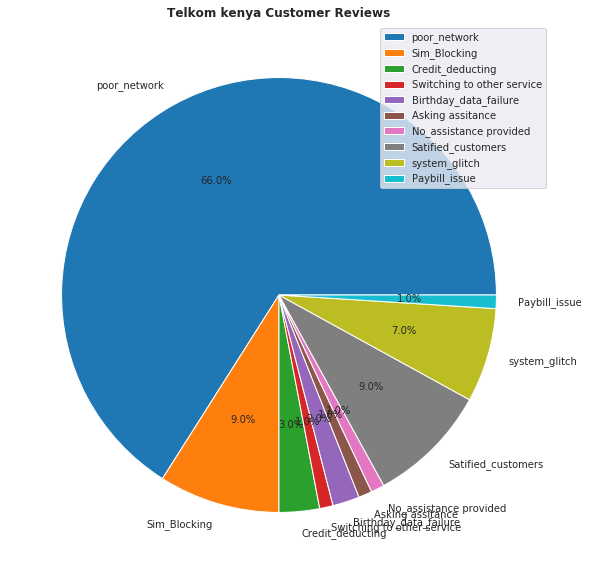

In [34]:
# Creating plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 10))

plt.pie(darts ,labels = sentiment,autopct="%1.1f%%")
plt.title('Telkom kenya Customer Reviews',fontweight='bold')
plt.legend(labels = sentiment)
plt.savefig("Telkom Kenya Customers Reviews")
# show plot
plt.show()

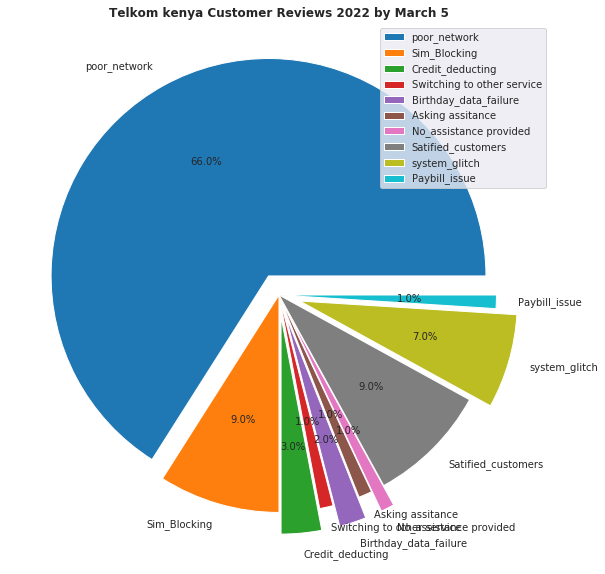

In [38]:
# Creating plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 10))

plt.pie(darts ,explode,labels = sentiment,autopct="%1.1f%%")
plt.title('Telkom kenya Customer Reviews 2022 by March 5',fontweight='bold')
plt.legend(labels = sentiment)
plt.savefig("Telkom Kenya Customers Reviews2 ")
# show plot
plt.show()

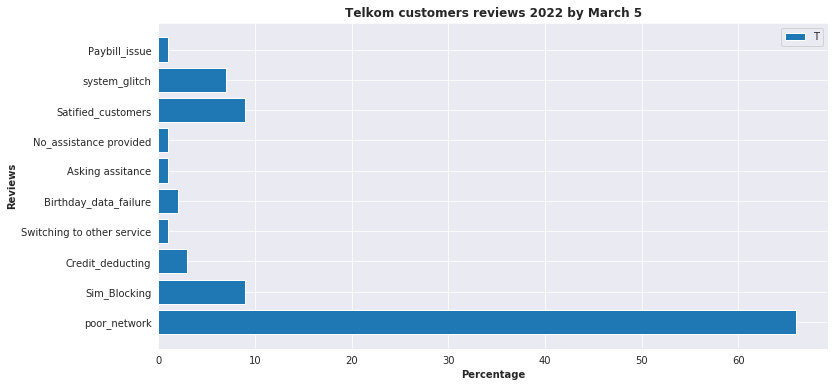

In [40]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.barh(sentiment,darts )
plt.legend('Telkom reviews')
plt.xlabel('Percentage',fontweight='bold')
plt.ylabel('Reviews',fontweight='bold' )

plt.title('Telkom customers reviews 2022 by March 5',fontweight='bold')
plt.savefig("Telkom Kenya Customers  report1 2022 ")
plt.show()